In [1]:
#pip install plotly

In [2]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
%matplotlib inline
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
file_date

'04-07-2020'

In [5]:
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'

In [6]:
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [7]:
### Quick look at the  dataframe
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-07 23:04:49,34.223334,-82.461707,5,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-07 23:04:49,30.295065,-92.414197,82,2,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-07 23:04:49,37.767072,-75.632346,11,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-07 23:04:49,43.452658,-116.241552,419,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-07 23:04:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [8]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [9]:
### Replace NaN values by 0
df.fillna(0, inplace=True)

In [10]:
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)

In [11]:
###Set the country name as index
df_countries.set_index('Country_Region', inplace=True)

In [12]:
### Group datas by Country
df_countries=df_countries.groupby('Country_Region').sum()

In [13]:
### Sort 15 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top 15 entries
df_countries_top15 = df_countries.head(15)
###Index columns as DataFrame series
cols = df_countries_top15.keys()
###Some Active data are missing , so let's do the maths to correst this
pd.options.mode.chained_assignment = None
df_countries_top15['Active'] = df_countries_top15['Confirmed'] - (df_countries_top15['Recovered'] + df_countries_top15 ['Deaths'])

In [14]:
df_countries_top15_grouped = df_countries_top15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_top15_grouped = df_countries_top15_grouped.reset_index()

In [15]:
### Show Countries with most Active cases
df_countries_top15_grouped_active = df_countries_top15_grouped[df_countries_top15_grouped['Active']==0]
df_countries_top15_grouped_active = df_countries_top15_grouped[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_top15_grouped_active = df_countries_top15_grouped.sort_values('Active', ascending=False)
df_countries_top15_grouped_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
13,US,396223,12722,21763,361738
8,Italy,135586,17127,24392,94067
10,Spain,141942,14045,43208,84689
5,France,110065,10343,19523,80199
6,Germany,107663,2016,36081,69566
14,United Kingdom,55949,6171,325,49453
12,Turkey,34109,725,1582,31802
7,Iran,62589,3872,27039,31678
9,Netherlands,19709,2108,272,17329
1,Belgium,22194,2035,4157,16002


In [16]:
df_countries_min15 = df_countries.tail(15)

In [17]:
df_countries_min15 = df_countries_min15.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
df_countries_min15 = df_countries_min15.reset_index()

In [18]:
### Show Countries with less Active cases
df_countries_min15_active = df_countries_min15[df_countries_min15['Active']==0]
df_countries_min15_active = df_countries_min15[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df_countries_min15_active = df_countries_min15.sort_values('Active', ascending=True)
df_countries_min15_active.style.background_gradient(cmap='Blues')

,Country_Region,Confirmed,Deaths,Recovered,Active
5,Gambia,4,1,2,1
13,Timor-Leste,1,0,0,1
9,Papua New Guinea,2,0,0,2
12,South Sudan,2,0,0,2
1,Bhutan,5,0,2,3
3,Burundi,3,0,0,3
7,Mauritania,6,1,2,3
10,Sao Tome and Principe,4,0,0,4
14,Western Sahara,4,0,0,4
2,Botswana,6,1,0,5


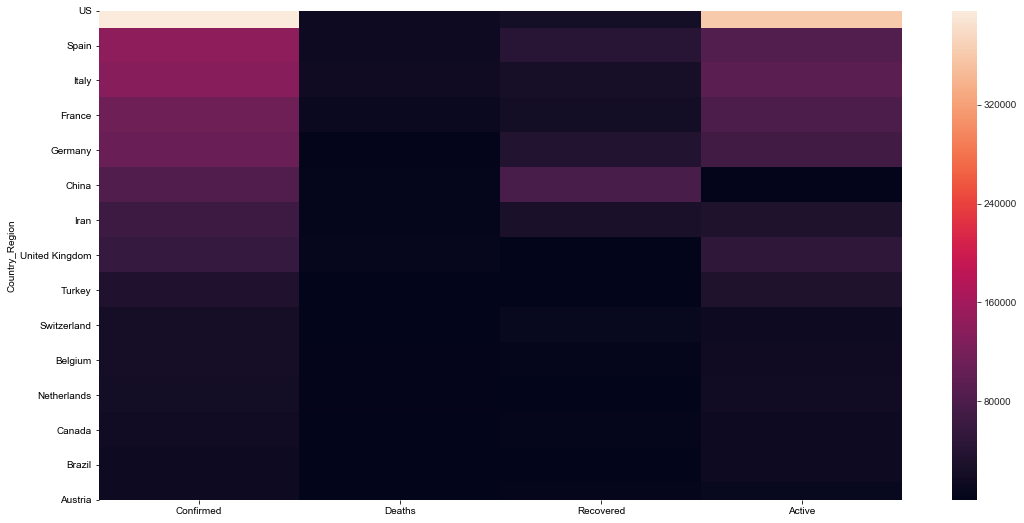

In [19]:
### Show heatmap
ax = plt.subplots(figsize=(18, 9))
sns.set_style("darkgrid")
sns.heatmap(df_countries_top15)

In [20]:
### Show Correlation Table 
df_countries_top15.describe()

,Confirmed,Deaths,Recovered,Active
count,15.000000,15.000000,15.000000,15.000000
mean,82369.666667,5108.266667,18161.333333,59100.066667
std,98039.220139,5648.781113,21581.905293,89190.540195
min,12639.000000,243.000000,127.000000,1973.000000
25%,20951.500000,773.000000,2686.500000,13463.500000
50%,55949.000000,2108.000000,8704.000000,31678.000000
75%,108864.000000,8257.000000,25715.500000,74882.500000
max,396223.000000,17127.000000,77410.000000,361738.000000


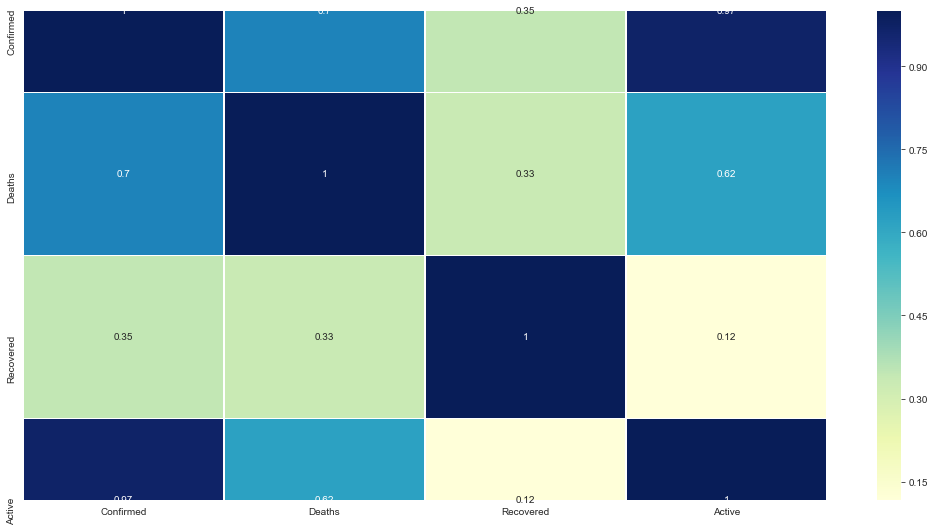

In [21]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 9))
sns.heatmap(df_countries_top15.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

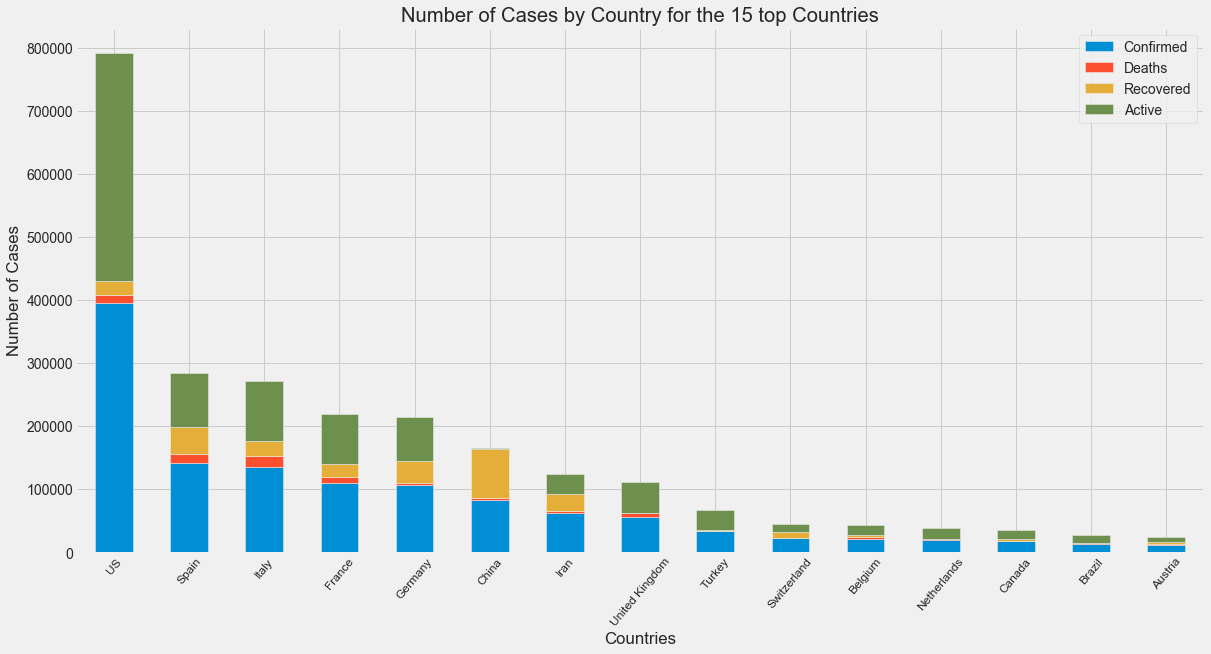

In [22]:
### Show Stacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=True)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

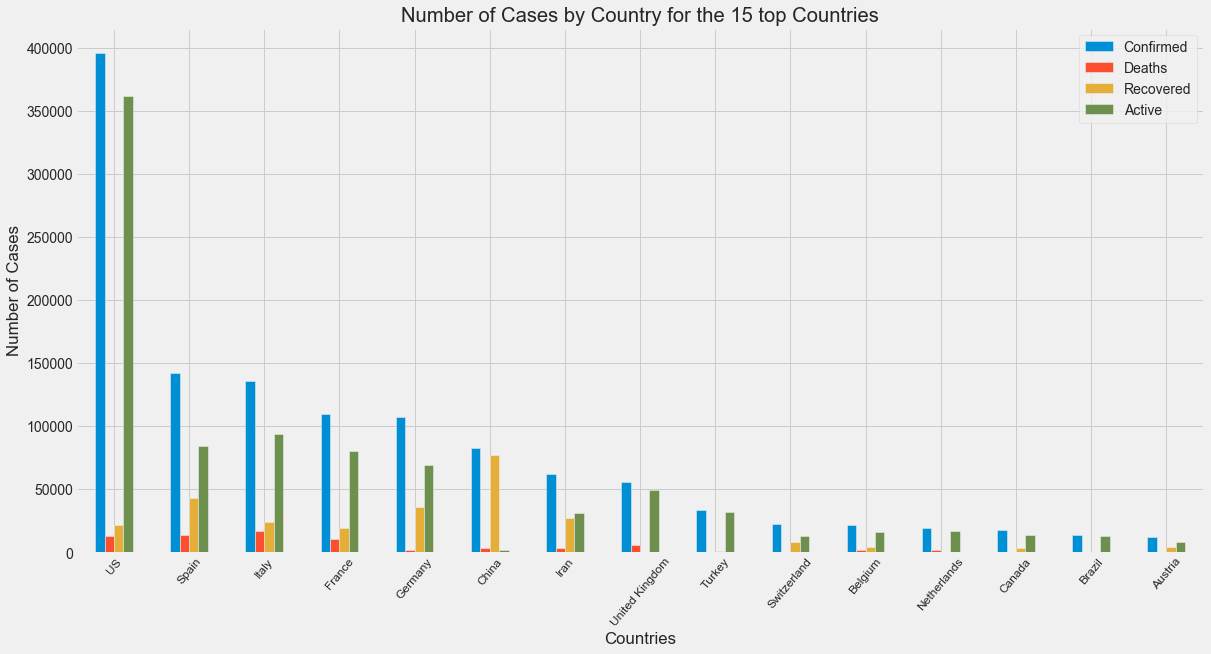

In [23]:
### Show Unstacked Histogram
plt.style.use('fivethirtyeight')
df_countries_top15.plot(kind='bar', figsize=(18, 9), stacked=False)
plt.title('Number of Cases by Country for the 15 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.xticks(rotation=50, size=12)
plt.show()

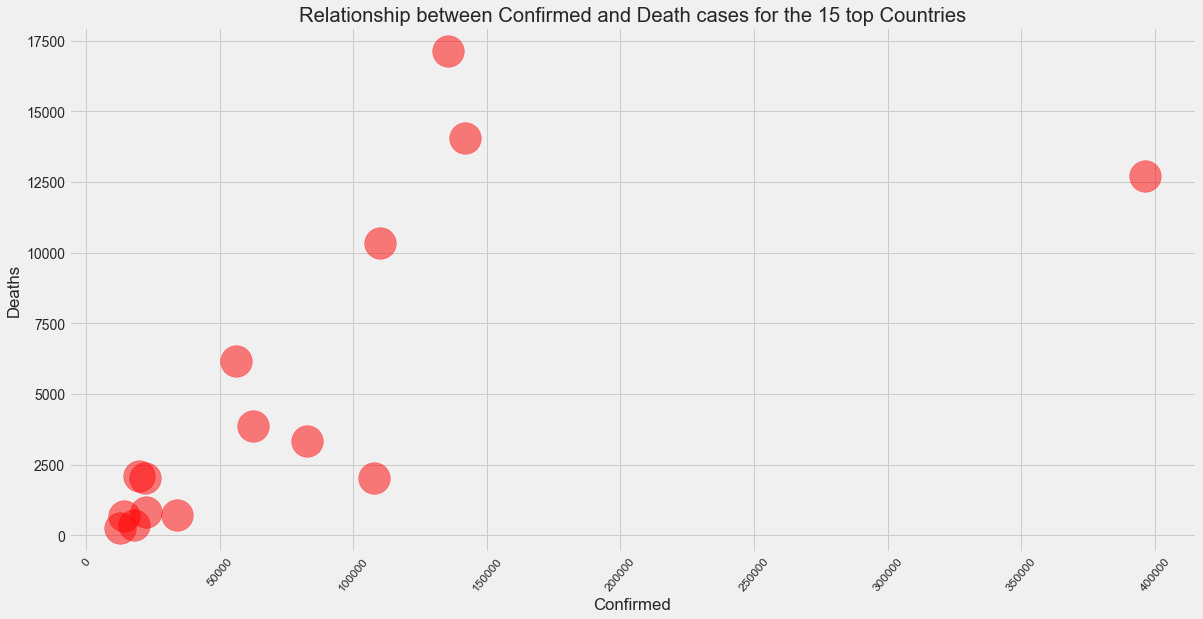

In [24]:
### Show Scatter plot
df_countries_top15.plot(kind='scatter' ,x='Confirmed',y='Deaths', alpha=0.5,color='red', figsize=(18, 9), s=1000)
plt.title('Relationship between Confirmed and Death cases for the 15 top Countries')
plt.ylabel('Deaths')
plt.xlabel('Confirmed')
plt.xticks(rotation=50, size=12)
plt.show()

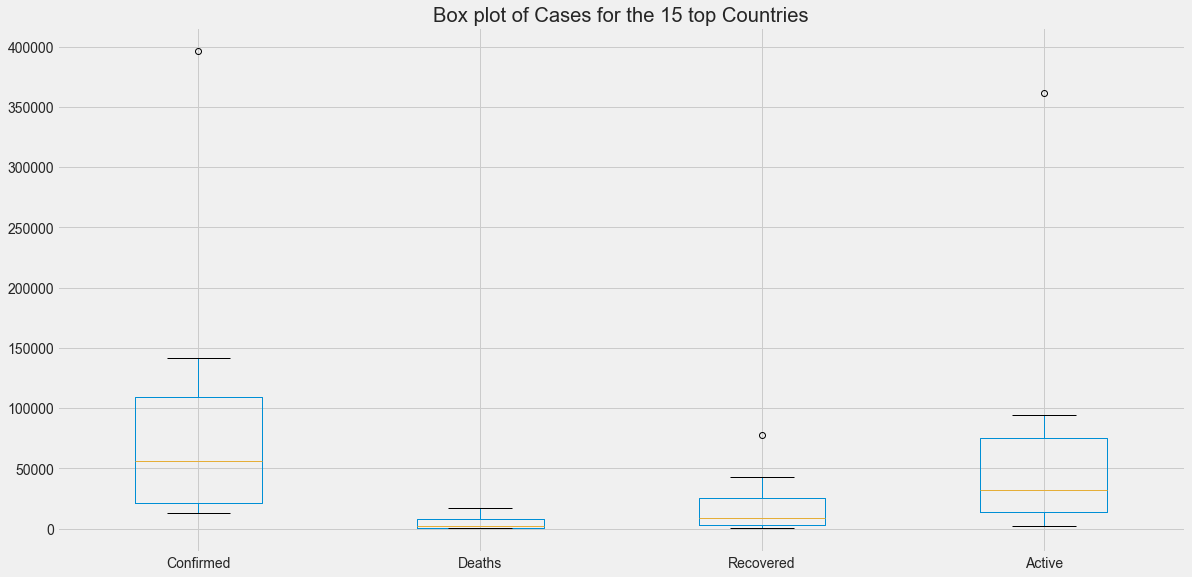

In [25]:
### Show Box plot
count = np.histogram(df_countries_top15, 15)
df_countries_top15.plot(kind ='box', 
          figsize=(18, 9))
plt.title('Box plot of Cases for the 15 top Countries')
plt.show()

In [26]:
### Sort 8 top countries by Confirmed cases
df_countries.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top  entries
df_countries_top8= df_countries.head(8)
###Index columns as DataFrame series
cols = df_countries_top8.keys()
df_countries_top8.head(8)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,396223,12722,21763,361738
Spain,141942,14045,43208,84689
Italy,135586,17127,24392,94067
France,110065,10343,19523,80199
Germany,107663,2016,36081,69566
China,82718,3335,77410,1973
Iran,62589,3872,27039,31678
United Kingdom,55949,6171,325,49453


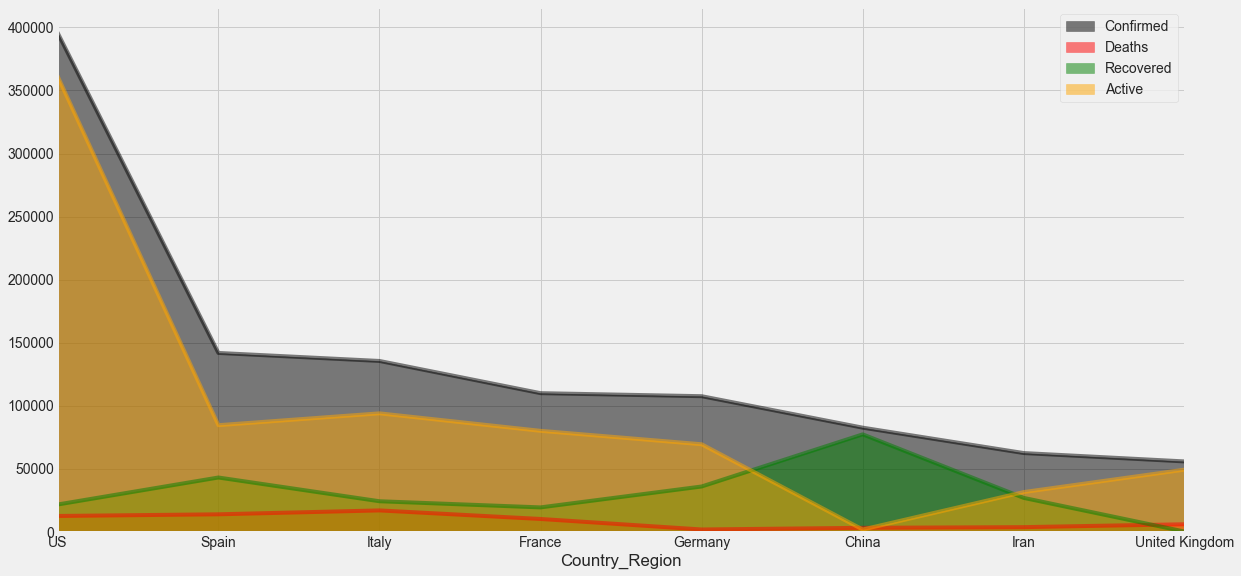

In [27]:
# Line plot top 8 countries
df_countries_top8.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['black', 'red', 'green', 'orange']) 
plt.show()

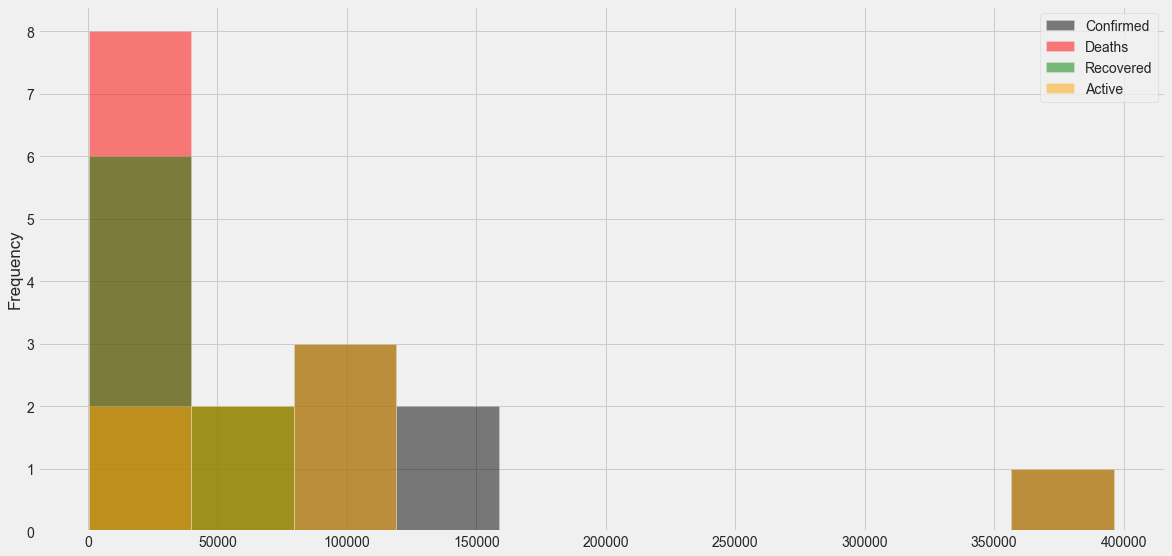

In [28]:
# Histogram plot top 8 countries
df_countries_top8.plot(kind='hist', figsize=(18, 9),stacked=False, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()

In [29]:
#### to be continued ....